# Comparison of Different classification methods

In [1]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
function= lambda x: x.flatten()
X_train= np.array(list(map(function,X_train)))
X_test= np.array(list(map(function,X_test)))


In [105]:
results= pd.DataFrame(data=y_test,columns=["true_value"])

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
predicted = lg.predict(X_test)
results['Log_Regression']=predicted



D:\Python3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [109]:
y_train.shape

(60000,)

# MLP 
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]¶

## MLP with one hidden layer 128

In [110]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( alpha=1e-5,
                     hidden_layer_sizes=(128, ), random_state=1)
clf.fit(X_train,y_train)
predicted=clf.predict(X_test)
results['MLP_1']=predicted


## MLP with two hidden layers 256 - 128

In [111]:
clf = MLPClassifier( alpha=1e-5,
                     hidden_layer_sizes=(128,256 ), random_state=1)
clf.fit(X_train,y_train)
predicted=clf.predict(X_test)
results['MLP_2']=predicted


In [112]:
results

,true_value,Log_Regression,MLP_1,MLP_2
0,7,7,7,7
1,2,2,2,2
2,1,1,1,1
3,0,0,0,0
4,4,4,4,4
...,...,...,...,...
9995,2,2,2,2
9996,3,3,3,3
9997,4,4,4,4
9998,5,5,5,5


# CNN

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms

In [20]:
import torch.nn as nn
import torch.nn.functional as F


In [71]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1c289a791d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1c2899ea410>}

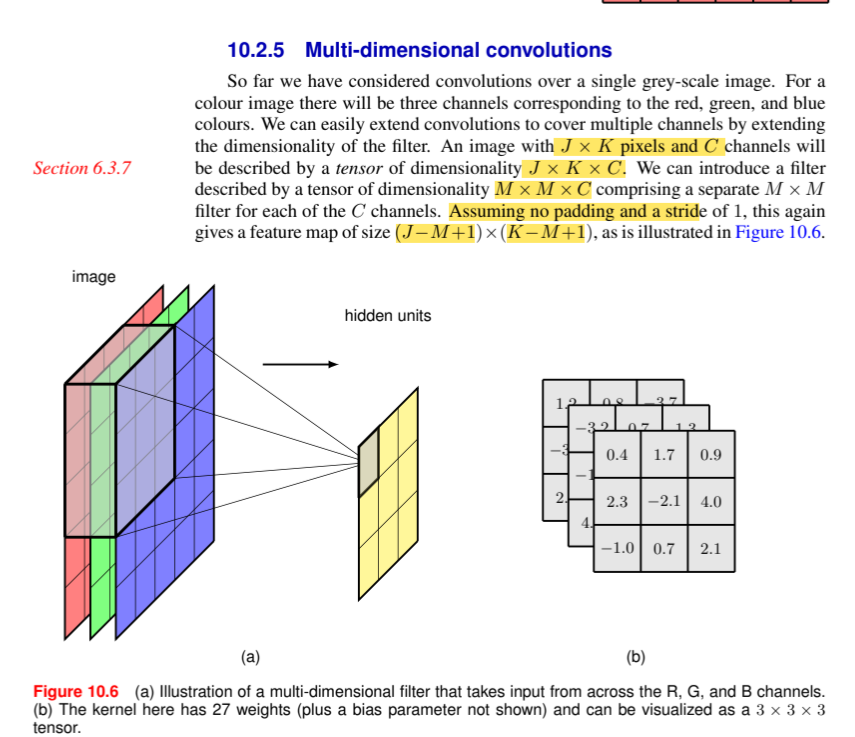

In [43]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Importing data


In [73]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [139]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=False,
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=False,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1c2a9766150>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1c289589cd0>}

Calculating the feature map dimensions<br>
$28-5+1 +2*2= 28 / 2 > 14 $  <br>
$14-5+1  +2*2=14/2 = 7$

5 is the filter (kernel) dimensions. A padding of $2*2$ adds $2*2$ dimensions. A maxpool of (2,2) half the dimensions

In [120]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels= 16, kernel_size=5,padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels= 32, kernel_size=5,padding=2)
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)

        x = x.view(x.size(0), -1)# flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return x


net = Net()

In [123]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [124]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, net, loaders):
    
    net.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = net(b_x)           
            loss = criterion(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
            pass
    
    
        pass
train(num_epochs, net, loaders)

Epoch [1/10], Step [100/600], Loss: 0.3870
Epoch [1/10], Step [200/600], Loss: 0.1651
Epoch [1/10], Step [300/600], Loss: 0.1293
Epoch [1/10], Step [400/600], Loss: 0.0960
Epoch [1/10], Step [500/600], Loss: 0.1082
Epoch [1/10], Step [600/600], Loss: 0.0592
Epoch [2/10], Step [100/600], Loss: 0.0218
Epoch [2/10], Step [200/600], Loss: 0.0706
Epoch [2/10], Step [300/600], Loss: 0.1215
Epoch [2/10], Step [400/600], Loss: 0.0412
Epoch [2/10], Step [500/600], Loss: 0.0093
Epoch [2/10], Step [600/600], Loss: 0.0189
Epoch [3/10], Step [100/600], Loss: 0.0544
Epoch [3/10], Step [200/600], Loss: 0.1261
Epoch [3/10], Step [300/600], Loss: 0.0042
Epoch [3/10], Step [400/600], Loss: 0.0661
Epoch [3/10], Step [500/600], Loss: 0.0916
Epoch [3/10], Step [600/600], Loss: 0.0133
Epoch [4/10], Step [100/600], Loss: 0.0274
Epoch [4/10], Step [200/600], Loss: 0.0165
Epoch [4/10], Step [300/600], Loss: 0.0170
Epoch [4/10], Step [400/600], Loss: 0.0784
Epoch [4/10], Step [500/600], Loss: 0.0035
Epoch [4/10

In [140]:

predicted=[]
def test():
    # Test the model
    net.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output = net(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            predicted.extend(list(pred_y.numpy()))
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
            
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    pass
        
test()

Test Accuracy of the model on the 10000 test images: 1.00


In [141]:
results['CNN']=predicted

In [142]:
results

,true_value,Log_Regression,MLP_1,MLP_2,CNN
0,7,7,7,7,7
1,2,2,2,2,2
2,1,1,1,1,1
3,0,0,0,0,0
4,4,4,4,4,4
...,...,...,...,...,...
9995,2,2,2,2,2
9996,3,3,3,3,3
9997,4,4,4,4,4
9998,5,5,5,5,5


# Comparison

                      ******Log_Regression******
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



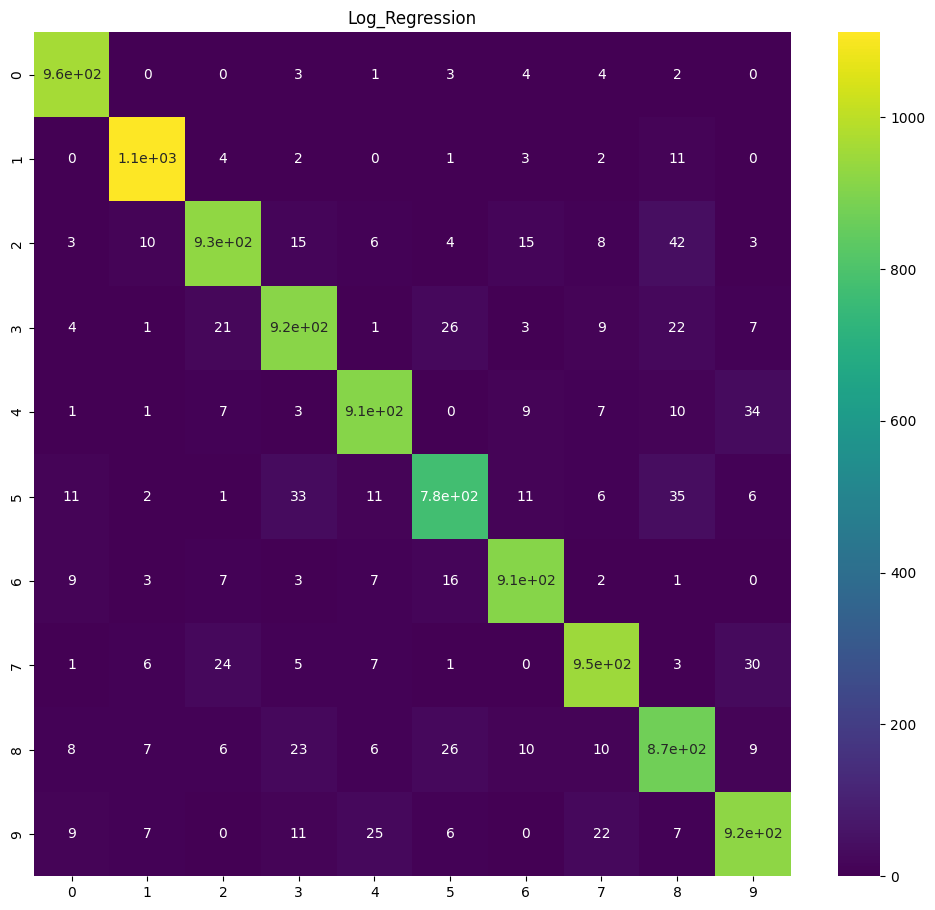

****************************************************************************************************
                      ******MLP_1******
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.94      0.97      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


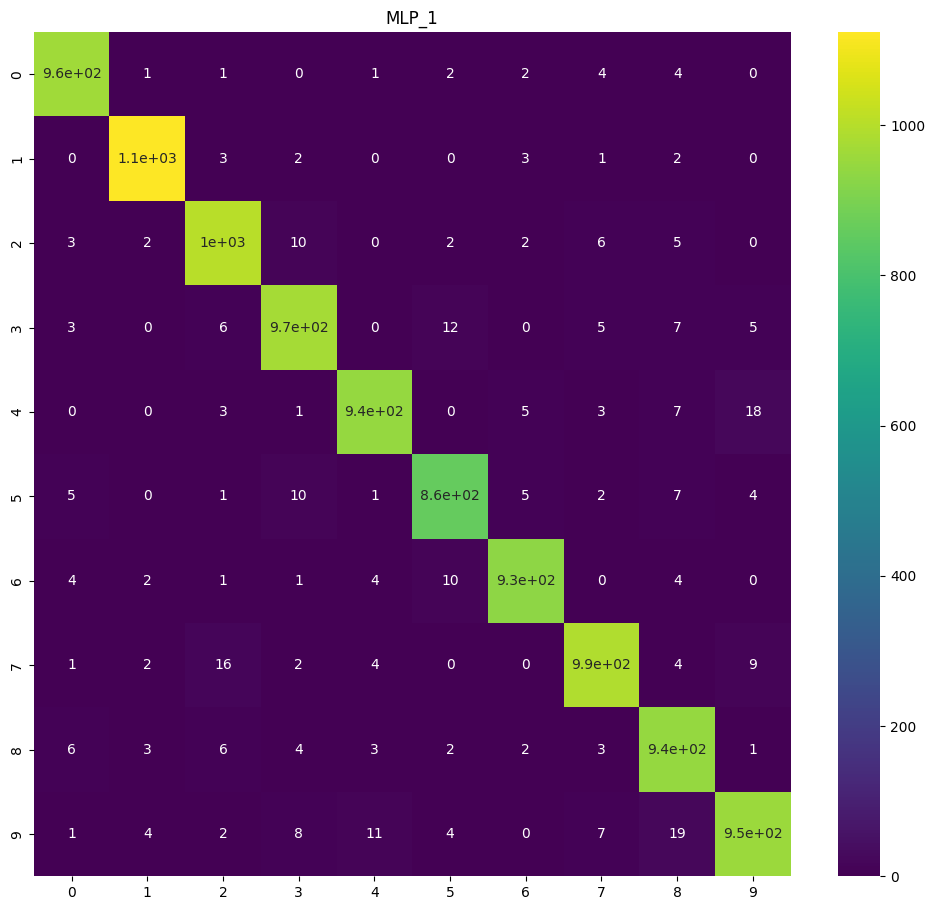

****************************************************************************************************
                      ******MLP_2******
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


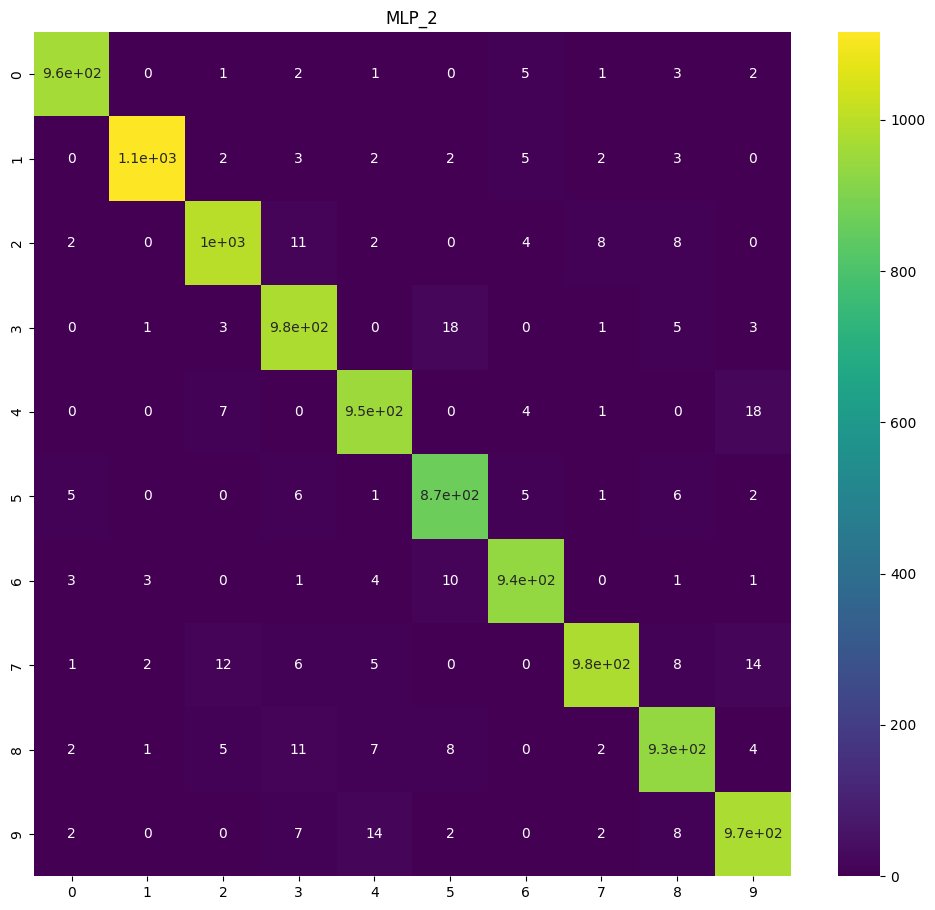

****************************************************************************************************
                      ******CNN******
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



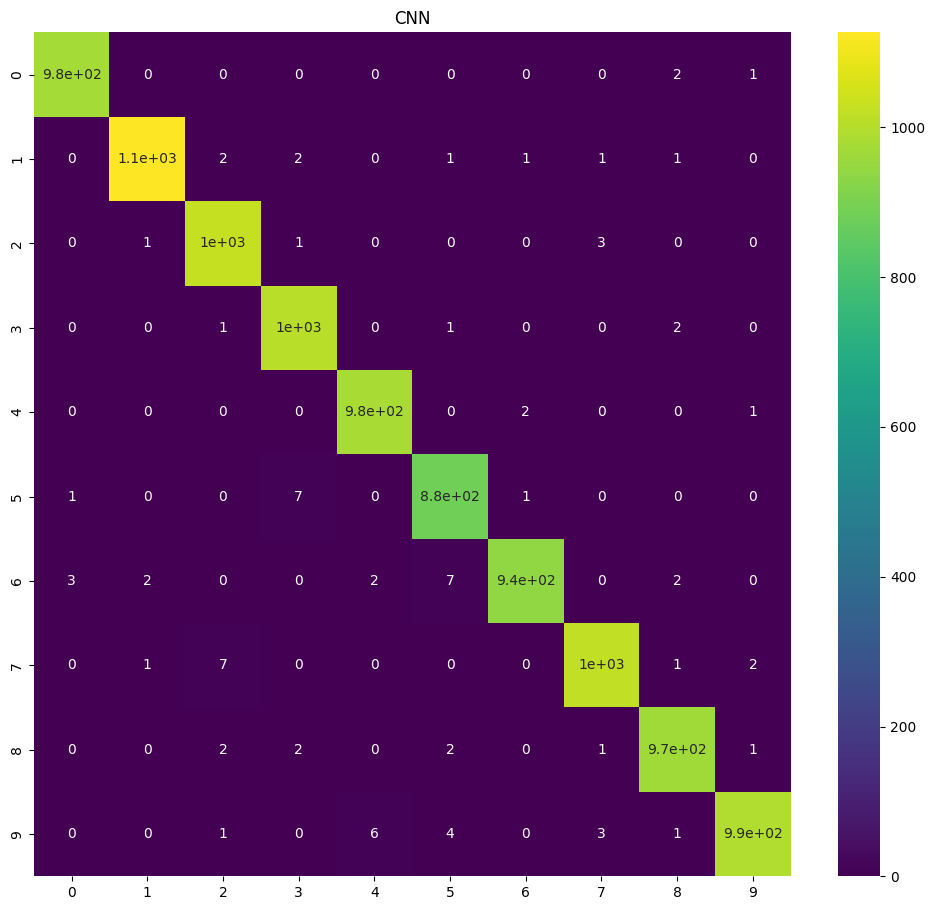

****************************************************************************************************


In [234]:
from sklearn.metrics import confusion_matrix,classification_report
performance_metrics= pd.DataFrame()
i=0
accuracy={}
for method in results.columns[1:]:
    print(f"                      ******{method}******")

    print(100*"*")
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    confusion_mat= confusion_matrix(results['true_value'],results[method])
    report= classification_report(results['true_value'],results[method])
    report_dic=classification_report(results['true_value'],results[method],output_dict=True)
    accuracy[method]=report_dic["accuracy"]
    print(report)
    ax.set_title(f"{method}")   
    sns.heatmap(confusion_mat,annot=True,cmap="viridis")
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print(100*"*")

    

In [243]:
print(pd.DataFrame(data=accuracy,index=range(1)))

   Log_Regression   MLP_1   MLP_2     CNN
0          0.9255  0.9684  0.9698  0.9918


# References:

# Websites:
1- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
2- https://scikit-learn.org/stable/modules/neural_networks_supervised.html<br>
3- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html<br>
4- fastai<br>
5- Elements of statistical learning and introduction to statistical learning

#   GPT prompts:

Asking to fix the dimensions of feature map of the CNN. Because initially I got the matrix multipication incomaptile dimensions error